In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
from scipy import optimize
from scipy.stats import sem

import os
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker
from venn import venn, pseudovenn
from matplotlib_venn import venn2, venn3
import seaborn as sns
from matplotlib.collections import PathCollection
from scipy.stats import sem, ttest_ind, f_oneway, kruskal

from Bio import SeqIO, SeqUtils
from Bio.SeqUtils.ProtParam import ProteinAnalysis

from addict import Dict
import json

import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.patches import Rectangle, Patch

In [4]:
import proteomics_functions as prot_fun

sys.path.append("/home/chase/codes/python_functions/")
import plotting as my_plot

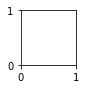

In [5]:
fig, ax = my_plot.instantiate_fig(1, 1)

In [6]:
df_aex = pd.read_csv('./generated_tables/swath_master_df_ppm.csv')
df_prev = pd.read_csv('../2022-09-20_sec_proteomics/generated_tables/swath_master_df_ppm.csv')

In [7]:
resins = ['cq', 'xq', 'hq']
fracs = ['a5', 'b12', 'd9', 'g12', 'eluate']

resin_names = {'cq':'Capto Q', 'xq':'Poros XQ', 'hq':'Poros 50 HQ'}
frac_names = {'a5':'A5', 'b12':'B12', 'd9':'D9', 'g12':'G12', 'eluate':'Adsorbate'}
percent_loading = {'a5':'5%', 'b12':'28%', 'd9':'53%', 'g12':'99%', 'eluate':'Adsorbate'}

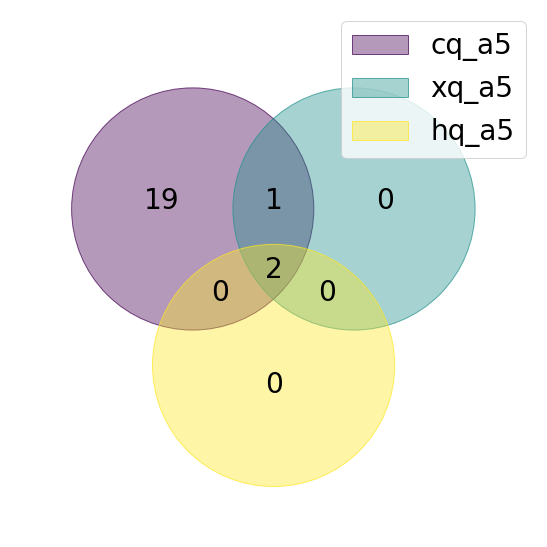

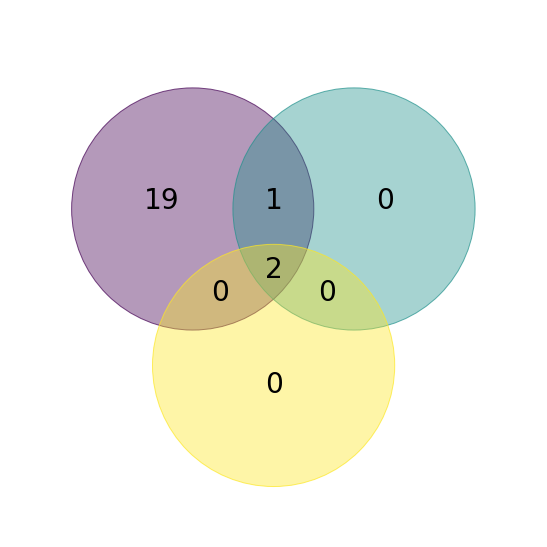

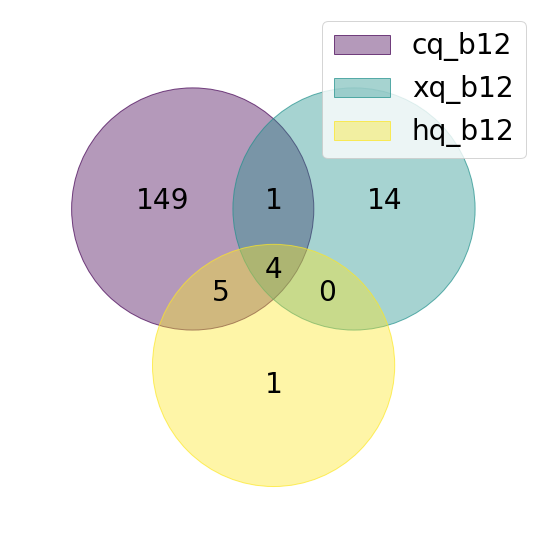

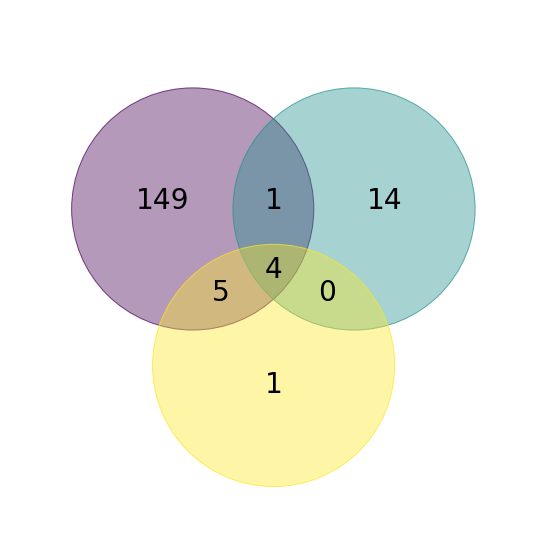

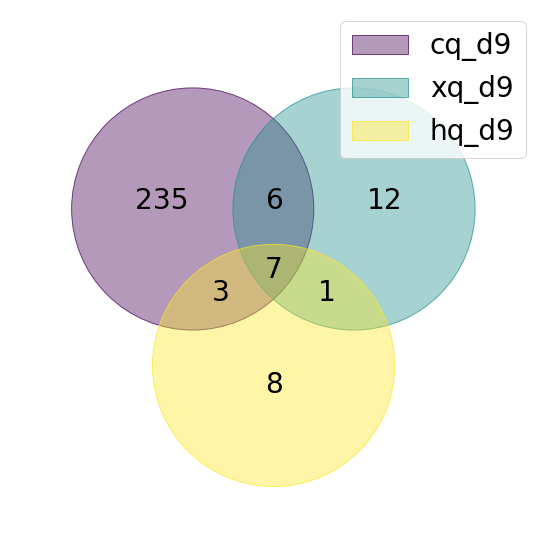

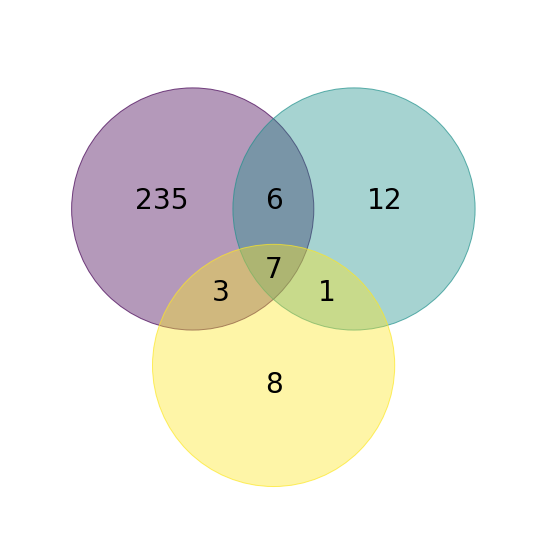

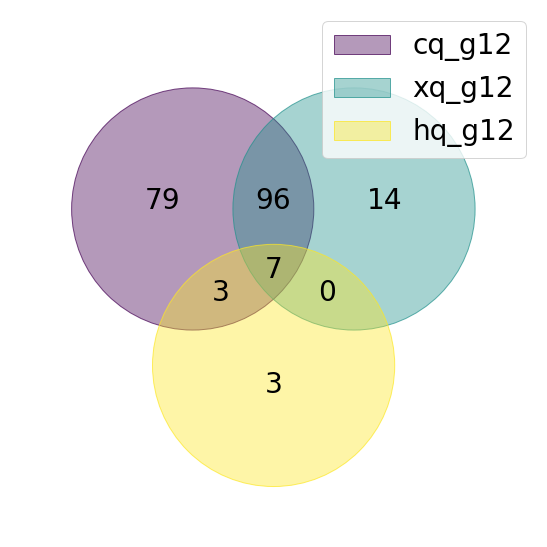

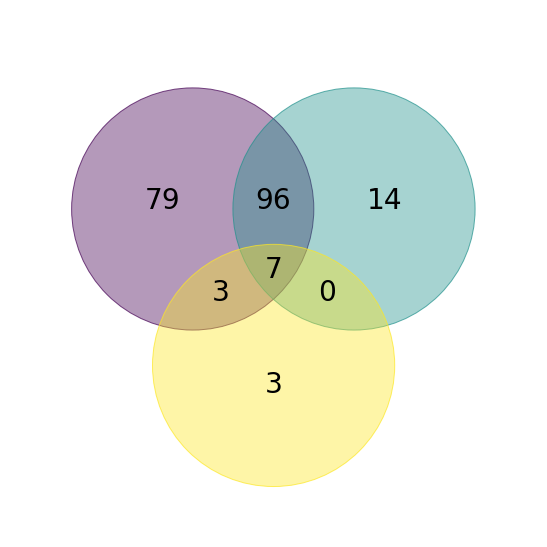

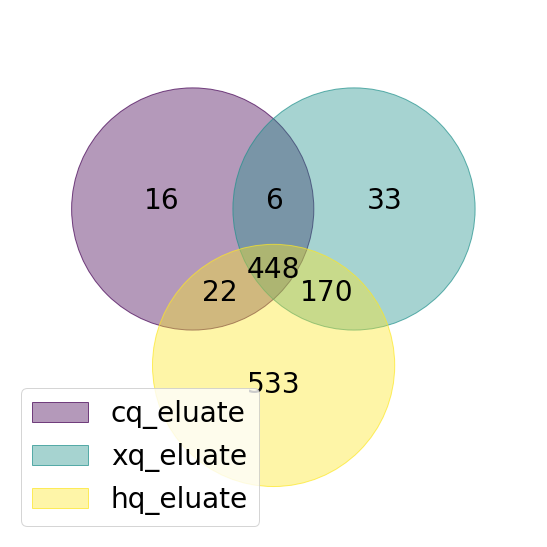

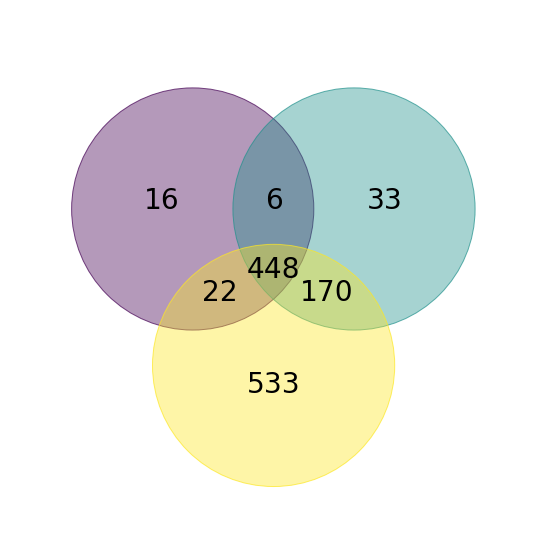

In [16]:
for frac in fracs:
    sets = Dict()
    for resin in resins:
        sample = f'{resin}_{frac}'
        sets[sample] = set(df_aex[df_aex[sample] > 0.0].accn)

    fig, ax = my_plot.instantiate_fig(8, 8)
    venn(sets, ax=ax, fontsize=28, legend_loc="best")
    my_plot.set_layout(fig, ax)
    fig.savefig(f'./images/13_venn_same_areas_{frac}_with_legend.png', dpi=300)
    
    fig, ax = my_plot.instantiate_fig(8, 8)
    venn(sets, ax=ax, fontsize=28, legend_loc=None)
    my_plot.set_layout(fig, ax)
    fig.savefig(f'./images/13_venn_same_areas_{frac}_no_legend.png', dpi=300)

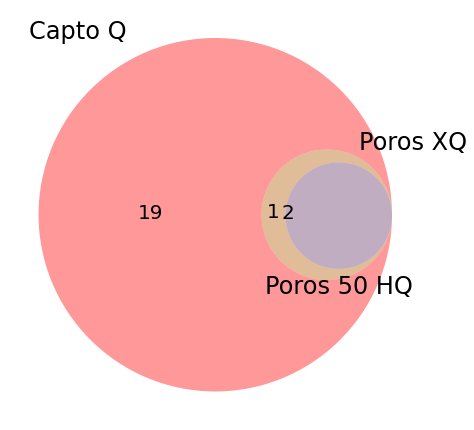

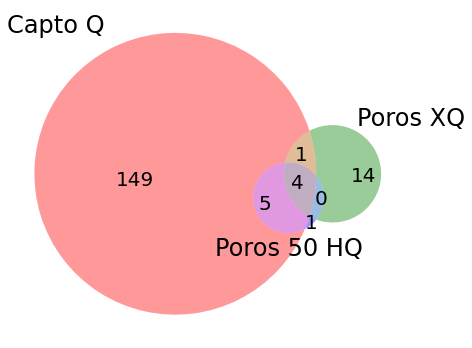

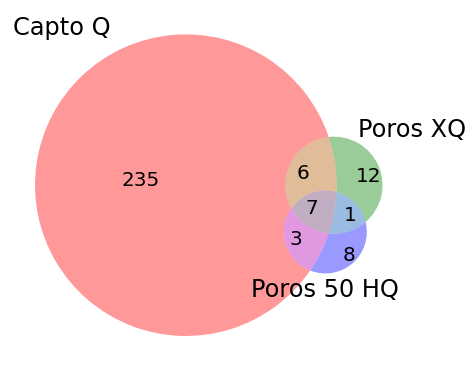

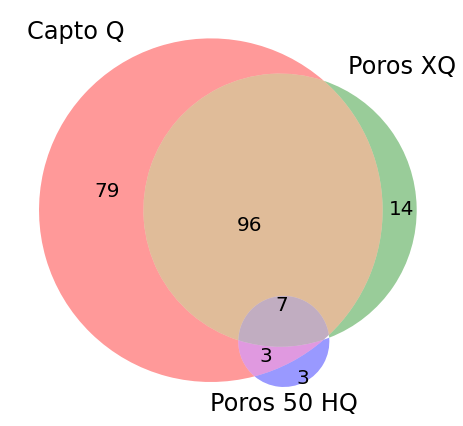

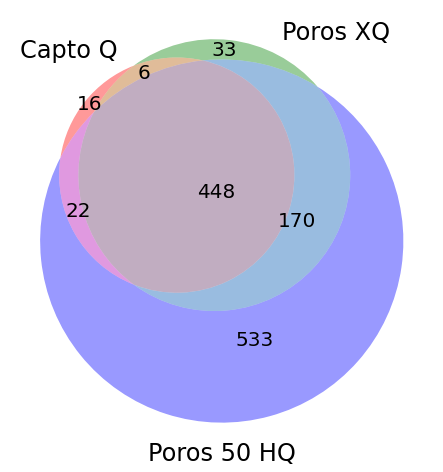

In [30]:
labels = ('Group A', 'Group B', 'Group C')  

for frac in fracs:
    sets = []
    labels = []
    for resin in resins:
        sample = f'{resin}_{frac}'
        sets.append(set(df_aex[df_aex[sample] > 0.0].accn))
#         labels.append(f'{resin_names[resin]} {percent_loading[frac]}')
        labels.append(f'{resin_names[resin]}')
        
    fig, ax = my_plot.instantiate_fig(7, 7)
    venn3(sets, ax=ax, set_labels=labels)
    my_plot.set_layout(fig, ax)
    fig.savefig(f'./images/13_venn_{frac}.png', dpi=300)